# Imports


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Without PCA

Loading data

In [2]:
X, y = datasets.fetch_openml('mnist_784', return_X_y=True, version=1)

Original data has 70000 samples, single sample has 784 features (28x28 pixels)

In [3]:
X.shape

(70000, 784)

Splitting, scaling and training model

In [4]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=10)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creating model & fitting and checking accuracy

In [5]:
%%time
model = LogisticRegression()
model.fit(X_train, y_train)
print(f'Accuracy = {model.score(X_test, y_test)}')

Accuracy = 0.9159428571428572
Wall time: 15.7 s


Plotting random samples with predictions from test data

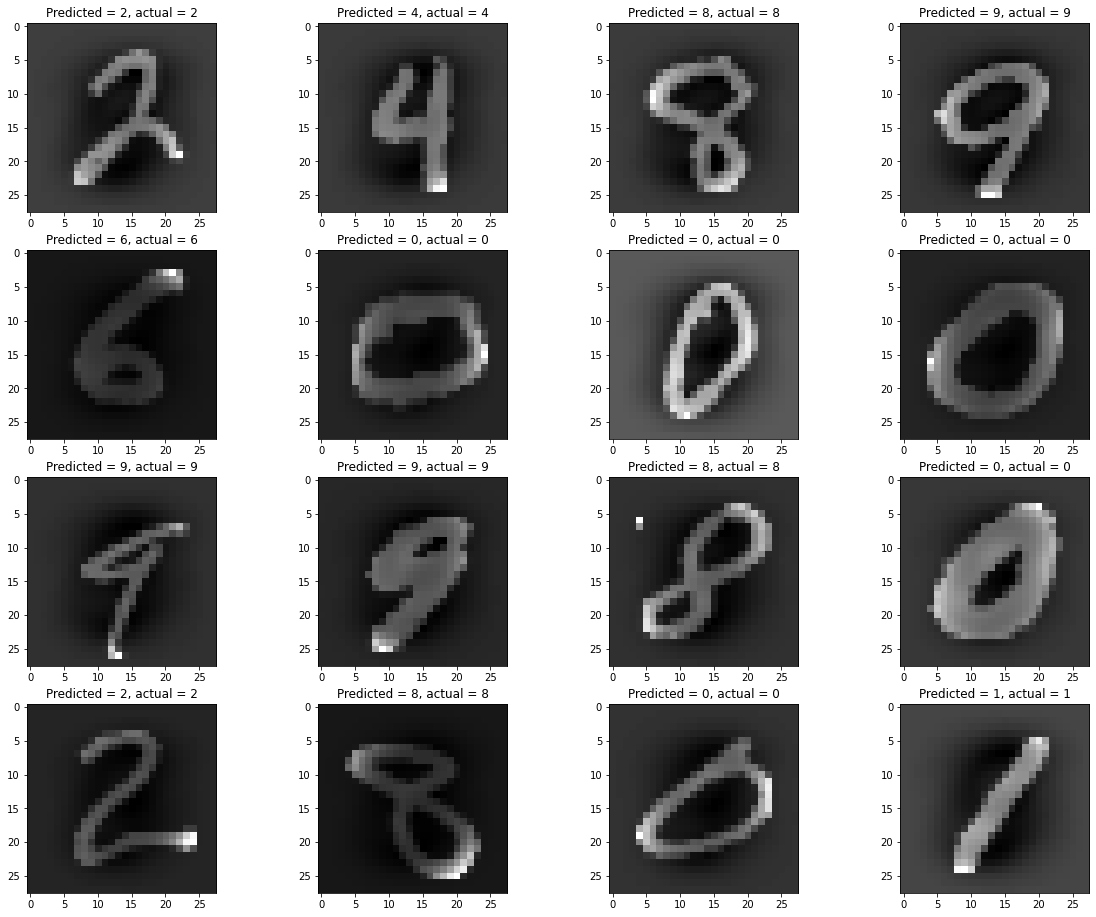

In [6]:
plt.figure(figsize=(20,16))
for i in range(16):
  randomPic = np.random.randint(0, len(X_test)-1)
  plt.subplot(4, 4, i+1)
  plt.imshow(X_test[randomPic].reshape(28, 28), cmap='gray')
  pred = model.predict(X_test[randomPic].reshape(1, -1))
  plt.title(f'Predicted = {pred[0]}, actual = {y_test[randomPic]}')
plt.show()

# With sklearn's PCA

Copying actual data to be able to standarize it and reduce dimensions using PCA

In [7]:
X_copy = X
X_copy = scaler.fit_transform(X_copy)

Splitting, scaling and training model and
Creating & fitting PCA. Using parameters n_components=0.95 and svd_solver='full' means that I want to reduce dimensions and still keep 95% of the original variance

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.25,
                                                    random_state=10)

pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

Creating model & fitting and checking accuracy

In [9]:
%%time
model = LogisticRegression()
model.fit(X_train, y_train)
print(f'Accuracy = {model.score(X_test, y_test)}')

Accuracy = 0.9211428571428572
Wall time: 9.11 s


After performing PCA algorithm runs faster and our number of dimensions is lowered

In [10]:
print(f'''Number of dimensions before PCA = {X.shape[1]}
Number of dimensions after PCA {X_test.shape[1]}
We've reduced {X.shape[1] - X_test.shape[1]} dimensions''')

Number of dimensions before PCA = 784
Number of dimensions after PCA 322
We've reduced 462 dimensions


# Implementation of PCA algorithm

Copying and scaling data

In [11]:
secondX_copy = X
secondX_copy = scaler.fit_transform(secondX_copy)

Splitting data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(secondX_copy, y,
                                                    test_size=0.25,
                                                    random_state=10)

Creating cov matrix

In [13]:
covMatrix = np.cov(X_train.T)
covMatrix.shape

(784, 784)

Creating eigen vectors, sorting eigenvalues in descending order to capture the highest variability and then making reduced matrix

In [14]:
eigen_vals, eigen_vecs = np.linalg.eigh(covMatrix)
sorted_index = np.argsort(eigen_vals)[::-1]
sorted_eigenvectors = eigen_vecs[:,sorted_index]
matrixReduced = sorted_eigenvectors[:,:332]

Transforming X_train and X_test

In [15]:
X_train = np.dot(matrixReduced.T, X_train.T).T
X_test = np.dot(matrixReduced.T, X_test.T).T

Creating model & fitting and checking accuracy

In [16]:
%%time
model = LogisticRegression()
model.fit(X_train, y_train)
print(f'Accuracy = {model.score(X_test, y_test)}')

Accuracy = 0.9213142857142858
Wall time: 8.96 s
